In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

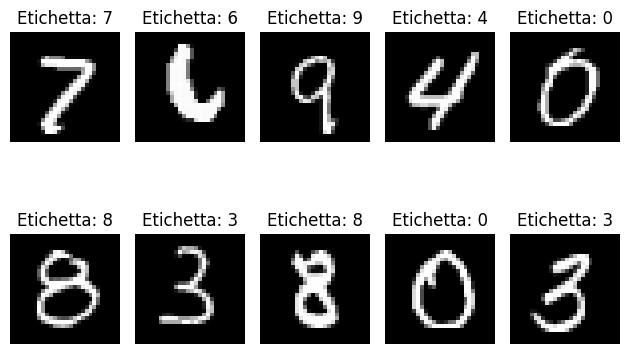

In [6]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.random.randint(0, X_train.shape[0], size=10)

for i, index in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[index].reshape(28, 28), cmap='gray')
    plt.title(f'Etichetta: {(y_train[index])}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , Rescaling, BatchNormalization, GlobalAveragePooling2D
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [9]:
model = Sequential()
model.add(Rescaling(1./255, input_shape=(28, 28, 1)))

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1),padding='same'))
#model.add(BatchNormalization())
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D((2, 2)))  

model.add(Conv2D(64, (3, 3), activation='relu',padding='same')) 
model.add(Conv2D(64, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2)))  
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Dropout(0.2))


model.add(Flatten())  
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])


model.summary()


c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,042 (797.04 KB)

 Trainable params: 204,042 (797.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 25ms/step - accuracy: 0.8071 - loss: 0.5753 - val_accuracy: 0.9861 - val_loss: 0.0468
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9701 - loss: 0.1089 - val_accuracy: 0.9900 - val_loss: 0.0319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9810 - loss: 0.0711 - val_accuracy: 0.9918 - val_loss: 0.0265
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9837 - loss: 0.0602 - val_accuracy: 0.9930 - val_loss: 0.0255
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9854 - loss: 0.0517 - val_accuracy: 0.9935 - val_loss: 0.0218
